In [1]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from SkeletonOfBeam import SkeletonOfBeam
from SkeletonOfBeam import GeometryToolBox

In [2]:
mesh = trimesh.load_mesh("cantilever.stl")

In [3]:
sob = SkeletonOfBeam(mesh, [1, 0, 0])

In [4]:
sob.getScaleAlongSkeletonVec()
sob.getIntersectionsFromStep(step=1)
sob.getSkeletonPoints()

sob.getNewCoordinate()
sob.getProjections()
sob.getSkeletonEqs()
sob.getDerivativeSkeletonEqs()

sob.getNewSkeletonPoints()
sob.getNewIntersections()

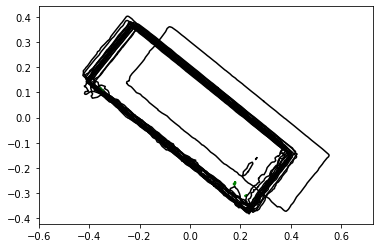

In [13]:
sob.showIntersections()

In [5]:
nVec1 = sob.returnTangentVectorAtXi(0)
nVec2 = sob.returnTangentVectorAtXi(0.5)
sp1 = sob.returnSkeletonPointsInXiRange(0, 0.5)
sp2 = sob.returnSkeletonPointsInXiRange(0.5, 1)

In [6]:
sp1

array([[0.00000000e+00, 9.13184666e-03, 9.13184666e-03],
       [2.05555556e+00, 7.02097636e-02, 7.02097636e-02],
       [4.11111111e+00, 1.38660303e-01, 1.38660303e-01],
       [6.16666667e+00, 2.13929256e-01, 2.13929256e-01],
       [8.22222222e+00, 2.95462414e-01, 2.95462414e-01],
       [1.02777778e+01, 3.82705568e-01, 3.82705568e-01],
       [1.23333333e+01, 4.75104510e-01, 4.75104510e-01],
       [1.43888889e+01, 5.72105030e-01, 5.72105030e-01],
       [1.64444444e+01, 6.73152921e-01, 6.73152921e-01],
       [1.85000000e+01, 7.77693973e-01, 7.77693973e-01]])

In [11]:
sob_1 = SkeletonOfBeam(mesh, nVec1)
sob_1.SkeletonPoints = sp1

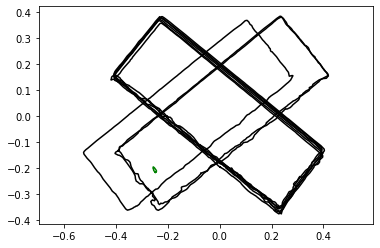

In [12]:
sob_1.getNewCoordinate()
sob_1.getProjections()
sob_1.getSkeletonEqs()
sob_1.getDerivativeSkeletonEqs()

sob_1.getNewSkeletonPoints()
sob_1.getNewIntersections()
sob_1.showIntersections()

In [14]:
sob_2 = SkeletonOfBeam(mesh, nVec2)
sob_2.SkeletonPoints = sp2

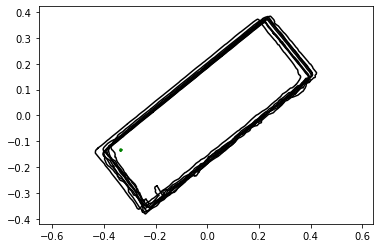

In [15]:
sob_2.getNewCoordinate()
sob_2.getProjections()
sob_2.getSkeletonEqs()
sob_2.getDerivativeSkeletonEqs()

sob_2.getNewSkeletonPoints()
sob_2.getNewIntersections()
sob_2.showIntersections()

In [21]:
slice = mesh.section(plane_origin=mesh.centroid, 
                 plane_normal=np.array([1, 0, 0]))
slice_2D, to_3D = slice.to_planar()
slice_firstPart = slice_2D.split()[0] # 分割，并选取第一个部分（应该是最大的那个部分）

In [22]:
print(slice)

<trimesh.Path3D(vertices.shape=(358, 3), len(entities)=2)>


In [54]:
slice_firstPart.to_3D(to_3D).centroid

array([-0.91451625, -0.13691134, -5.44386294])

In [4]:
mesh.bounds

array([[-21.28422928,  -1.49518299,  -6.24997091],
       [ 18.52413559,   1.31816697,  -4.69799995]])

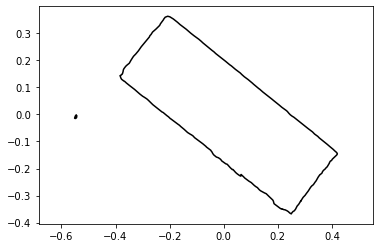

In [4]:
# get a single cross section of the mesh
slice = mesh.section(plane_origin=mesh.centroid, 
                     plane_normal=[1,0, 0])
slice_2D, to_3D = slice.to_planar()
slice_2D.show()

In [ ]:
slice_

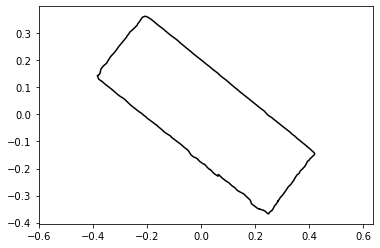

In [14]:
slices_splited = slice_2D.split()
sliceIndex = np.argmax([s.area for s in slices_splited])
slice_2D = slices_splited[sliceIndex]
slice_2D.show()

In [15]:
slice_2D.apply_obb()

array([[ 0.77499324, -0.63196952, -0.01554085],
       [ 0.63196952,  0.77499324, -0.00918349],
       [ 0.        ,  0.        ,  1.        ]])

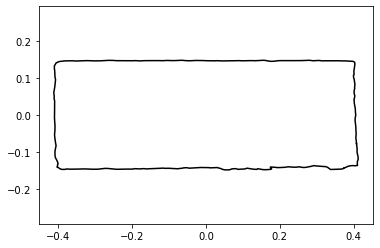

In [16]:
slice_2D.show()

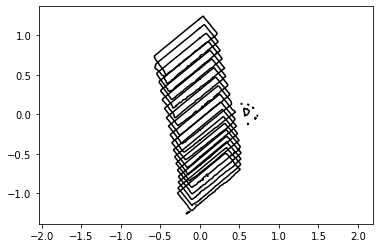

In [20]:
z_extents = mesh.bounds[:,0]
# slice every .125 model units (eg, inches)
z_levels  = np.arange(*z_extents, step=2)
sections = mesh.section_multiplane(plane_origin=mesh.centroid, 
                                   plane_normal=np.array([1, 0, 0]),
                                   heights=z_levels)

sections = [i for i in sections if i is not None]
combined = np.sum(sections)
combined.show()

In [20]:
import numpy as np


In [36]:
v1 = [1, 0, 0]
v2 = [0, 1, 0]

r = rotation_matrix(v1, v2)
r

array([[ 0., -1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [37]:
np.dot(r, v1)

array([0., 1., 0.])

In [30]:
def projected_point(point, plane_origin, planeVec1, planeVec2):
    """
    已知平面内一原点以及两个正交向量，求已知点在该平面内的投影坐标（二维）
    """
    pVec = np.asarray(point) - np.asarray(plane_origin)
    xVec = np.asarray(planeVec1) / np.linalg.norm(planeVec1)
    yVec = np.asarray(planeVec2) / np.linalg.norm(planeVec2)
    s1 = np.dot(pVec, xVec)
    s2 = np.dot(pVec, yVec)
    
    return np.array([s1, s2])

In [29]:
p = [1, 1, 5]
o = [0, 0, 0]
x = [1, 1, 0]
y = [-1, 1, 0]
projected_point(p, o, x, y)

array([1.41421356, 0.        ])

In [19]:
np.dot(r, v1)

array([0., 1., 0.])

In [14]:
np.arccos(np.dot([0, 1, 0], [1, 0, 0]))

1.5707963267948966

In [15]:
np.pi/2

1.5707963267948966

In [16]:
np.linalg.norm([1, 0, 0])

1.0